In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from scipy import stats 
import datetime as dt

In [13]:
moneda = 'BTC-USD'

btc = pd.read_csv('/home/sacbe/Bitmoney/cleaning/'+str(moneda)+'.csv', sep = ',')

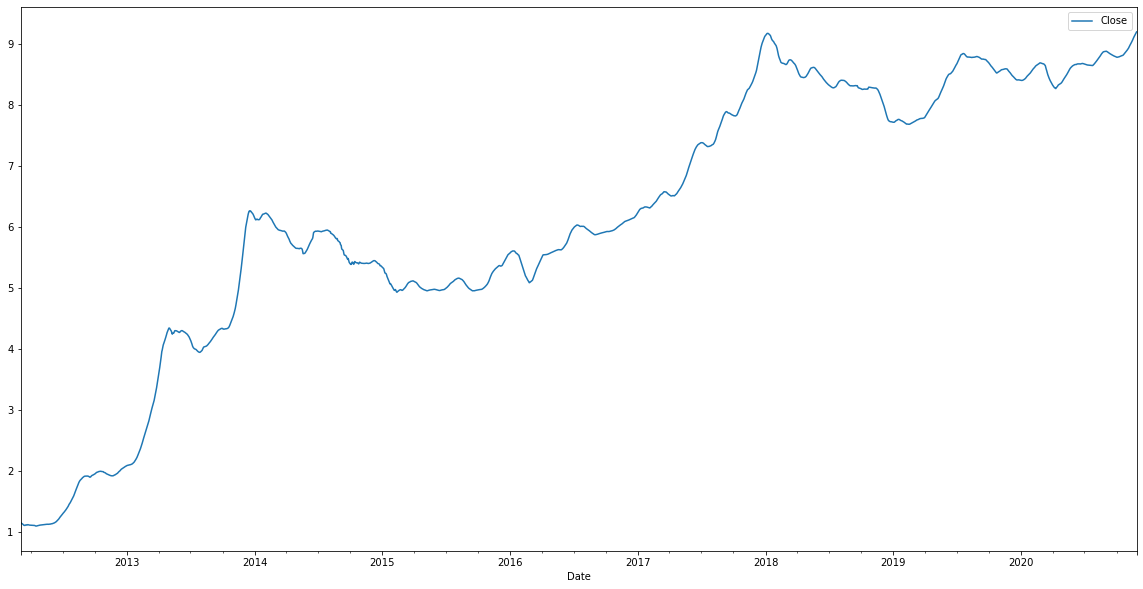

In [14]:
btc_t = np.log(btc['Close'])
btc_t = btc_t - (min(btc_t) - 1)

#Ventana de tiempo: 1 para diario, 7 para semanal, 30 para mensual
window_MA = 30

rolling = btc_t.rolling(window = window_MA)
btc_tMA = rolling.mean()
btc_tMA = pd.DataFrame(btc_tMA)
btc_tMA.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')
btc_tMA = btc_tMA.sort_index()
btc_tMA = btc_tMA.dropna()
#btc_tMA.to_csv('/home/sacbe/Bitmoney/'+str(moneda)+'_rolling_'+str(window_MA)+'.csv', encoding='utf-8', index=True)

btc_tMA.plot()
plt.show()


In [15]:
lista = np.array(btc_tMA)
fecha = np.arange(1,len(lista)+1)
#btc_t.to_csv('p.csv', encoding='utf-8', index=False)

In [16]:
#entropía
window = 10
count = 0.0
dataset_RMSEE = pd.DataFrame()
merged_data_RMSEE = pd.DataFrame()
for i in range(0, len(lista)):
    for j in range(i,(window+i)):
        count += -1 * (lista[j] * math.log(lista[j]))
        
    dataset_RMSEE = np.array((count)*(1/window))
    dataset_RMSEE = pd.DataFrame(dataset_RMSEE.reshape(1,1))
    dataset_RMSEE.index = [fecha[i]]
    merged_data_RMSEE = merged_data_RMSEE.append(dataset_RMSEE)
    count = 0
    if(i == (len(lista)-window)):
        break
merged_data_RMSEE.columns = ['Close']

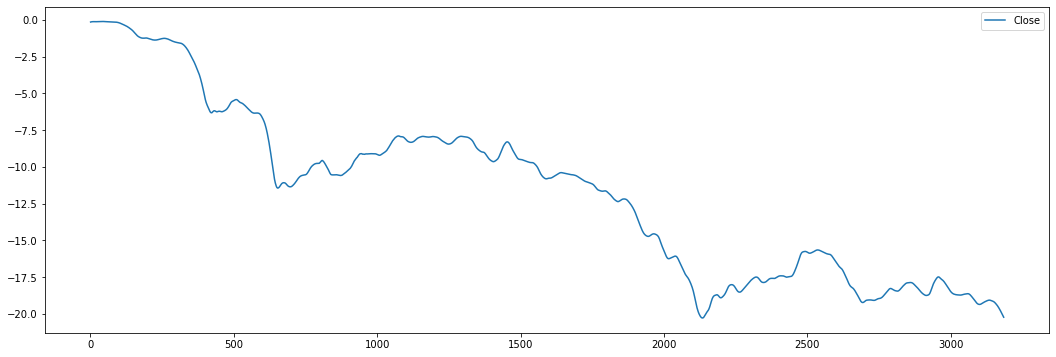

In [17]:
merged_data_RMSEE.plot(figsize = (18,6))

In [18]:
no_clusters = 10
kmeans = KMeans(n_clusters = no_clusters, random_state=170).fit(np.array(merged_data_RMSEE))

In [19]:
def k_means(data, no_clusters):
    kmeans = KMeans(n_clusters=no_clusters, random_state=170).fit(np.array(data))
    data2 = data.copy()
    data2["clusters"] = kmeans.labels_
    data2["nombre"] = "Cluster"

    data2["clusters"] = data2["nombre"].astype(str) + " " + data2["clusters"].astype(str)
    data2 = data2.drop(['nombre'], axis=1)
    return data2

In [20]:
k_m = k_means(merged_data_RMSEE, no_clusters)
k_m.to_csv('kmeans_'+str(moneda)+'_'+'MA'+str(window_MA)+'.csv', encoding='utf-8', index=True)

In [23]:
import os
import time
import threading
import multiprocessing
import os
import pandas as pd
import numpy as np
from PIL import Image

NUM_WORKERS = 4

def image():
    tam = 32
    tam2 = tam*tam
    dataset = pd.DataFrame()
    count = 0
    window = 10

    
    dataset = pd.read_csv('/home/sacbe/Bitmoney/kmeans_'+str(moneda)+'_'+'MA'+str(window_MA)+'.csv', sep = ',')
    count = 0
    data_group = dataset['clusters']
    dataset = dataset['Close']
    
    
    for i in range(0,(len(dataset) - tam2), tam):
        
        for j in range(i,(window+i)):
        
        
            data_img = dataset[j:tam2+1+j]
            data_label = data_group[j:tam2+1+j]
            count += 1
            x = 0 
            y = 0
            mini = min(data_img)
            maxi = max(data_img)
            df = np.zeros((tam, tam)).astype(np.uint8)
            for k in range(j, tam2+j):
                df[y][x] = round((data_img[k] - mini) / (maxi - mini)*255)
                x+=1
                if(x == tam):
                    y+=1
                    x = 0
            img = Image.fromarray(df)
            img.save('/home/sacbe/Bitmoney/test2/IMG/'+str(moneda)+'_'+str(window_MA)+'/'+str(count)+'_'+str(data_label[j])+'.png')
    print('Imagenes guardadas.')


def only_sleep():
    
    lista = [0,1,2,3]

    if(multiprocessing.current_process().name == "Process-1"):
    	image(lista[0])
    elif(multiprocessing.current_process().name == "Process-2"):
    	image(lista[1])
    elif(multiprocessing.current_process().name == "Process-3"):
    	image(lista[2])
    elif(multiprocessing.current_process().name == "Process-4"):
        image(lista[3])


 
 

def main(): 
    start_time = time.time()
    end_time = time.time()


    start_time = time.time()
    processes = [multiprocessing.Process(target=only_sleep) for _ in range(NUM_WORKERS)]
    [process.start() for process in processes]
    [process.join() for process in processes]
    end_time = time.time()
     
    print("Threads time=", end_time - start_time)
 

if __name__ == '__main__':
    main()


Threads time= 0.08143043518066406


In [24]:
#Ejecutar
image()

Imagenes guardadas.
